# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
import csv
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk import RegexpParser
from nltk.tree import Tree
import requests
from bs4 import BeautifulSoup
import spacy
from collections import Counter

In [3]:
movie_id = "tt9426210"  # John Wick: Chapter 4
base_url = f"https://www.imdb.com/title/{movie_id}/reviews"
n = 30
reviews = []


page_num = 1
while len(reviews) < n:
    page_url = f"{base_url}?start={page_num}"
    response = requests.get(page_url)
    soup = BeautifulSoup(response.content, "html.parser")


    review_elements = soup.find_all("div", class_="review-container")


    for review_element in review_elements:
        review_content = review_element.find("div", class_="text show-more__control")
        if review_content is not None:
            review_text = review_content.get_text()
            reviews.append(review_text.strip())

    page_num += 25


df = pd.DataFrame({"Review" : reviews})

df.to_csv("review.csv")

In [4]:
# Write your code here
df = pd.read_csv("review.csv")
reviews = df['Review'].tolist()
bigram_counts  = {}
for i in reviews:
  tokens  = i.lower().split()
  ngrams = zip(*[tokens[i:] for i in range(2)])
  ngrams  = [" ".join(ngram) for ngram in ngrams]
  for ngram in ngrams:
      if ngram in bigram_counts:
          bigram_counts[ngram] += 1
      else:
          bigram_counts[ngram] = 1


print(bigram_counts)




{"i can't": 2, "can't help": 2, 'help but': 2, 'but suspect': 2, 'suspect that': 2, 'that writer/director': 2, 'writer/director makoto': 2, 'makoto shinkai': 10, 'shinkai did': 2, 'did make': 2, 'make this': 2, 'this movie': 22, 'movie because': 4, 'because he': 4, 'he thought': 2, 'thought he': 2, 'he had': 6, 'had an': 4, 'an interesting': 2, 'interesting story': 2, 'story but': 2, 'but simply': 2, 'simply because': 2, 'he wanted': 2, 'wanted to': 6, 'to play': 2, 'play with': 2, 'with rain': 2, "rain animations.i'm": 2, "animations.i'm okay": 2, 'okay with': 2, 'with that.': 2, 'that. the': 2, 'the animation': 10, 'animation is': 8, 'is stunning,': 2, 'stunning, and': 2, 'and no': 6, 'no one': 4, 'one is': 6, 'is quite': 2, 'quite so': 2, 'so good': 2, 'good as': 6, 'as taking': 2, 'taking something': 2, 'something as': 2, 'as simple': 2, 'simple as': 2, 'as drops': 2, 'drops in': 2, 'in a': 16, 'a puddle': 2, 'puddle and': 2, 'and creating': 2, 'creating a': 2, 'a gorgeous': 2, 'go

In [5]:
unigram_count  = {}
for i in reviews:
  tokens  = i.lower().split()
  ngrams = zip(*[tokens[i:] for i in range(1)])
  ngrams  = [" ".join(ngram) for ngram in ngrams]
  for ngram in ngrams:
      if ngram in unigram_count:
          unigram_count[ngram] += 1
      else:
          unigram_count[ngram] = 1

In [6]:
bigram_probabilities = {}
for bigram in bigram_counts:
    word1 = bigram.split()[0]
    if word1 in unigram_count:
            bigram_probabilities[bigram] = bigram_counts[bigram] / unigram_count[word1]
    else:
            print(f"Warning: '{word1}' not found in unigram counts.")

In [7]:
print("Bigram Probabilities:", bigram_probabilities)

Bigram Probabilities: {"i can't": 0.013157894736842105, "can't help": 0.3333333333333333, 'help but': 0.5, 'but suspect': 0.02857142857142857, 'suspect that': 1.0, 'that writer/director': 0.02040816326530612, 'writer/director makoto': 1.0, 'makoto shinkai': 0.45454545454545453, 'shinkai did': 0.09090909090909091, 'did make': 0.5, 'make this': 0.125, 'this movie': 0.1746031746031746, 'movie because': 0.07142857142857142, 'because he': 0.3333333333333333, 'he thought': 0.06666666666666667, 'thought he': 0.3333333333333333, 'he had': 0.2, 'had an': 0.2222222222222222, 'an interesting': 0.08333333333333333, 'interesting story': 0.3333333333333333, 'story but': 0.05, 'but simply': 0.02857142857142857, 'simply because': 0.3333333333333333, 'he wanted': 0.06666666666666667, 'wanted to': 1.0, 'to play': 0.009615384615384616, 'play with': 1.0, 'with rain': 0.014705882352941176, "rain animations.i'm": 0.2, "animations.i'm okay": 1.0, 'okay with': 1.0, 'with that.': 0.014705882352941176, 'that. t

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [8]:
def compute_tf(document):
    tf_dict = {}
    total_terms = len(document)
    term_counts = {}

    for term in document:
        term_counts[term] = term_counts.get(term, 0) + 1

    for term, count in term_counts.items():
        tf_dict[term] = count / total_terms

    return tf_dict


In [9]:
from math import log

def compute_idf(documents):
    idf_dict = {}
    total_documents = len(documents)
    term_in_docs = {}

    for document in documents:
        for term in set(document):
            term_in_docs[term] = term_in_docs.get(term, 0) + 1

    for term, doc_count in term_in_docs.items():
        idf_dict[term] = log(total_documents / doc_count) + 1

    return idf_dict


In [10]:
def compute_tf_idf(documents):
    document_tf_idf = []

    idf_dict = compute_idf(documents)

    for document in documents:
        doc_tf = compute_tf(document)
        doc_tf_idf = {}
        for term, tf in doc_tf.items():
            doc_tf_idf[term] = tf * idf_dict.get(term, 0)
        document_tf_idf.append(doc_tf_idf)

    return document_tf_idf

def vectorize_query(query, idf_dict):
    query_tf = compute_tf(query)
    query_vector = {}
    for term, tf in query_tf.items():
        query_vector[term] = tf * idf_dict.get(term, 0)
    return query_vector


In [11]:
import numpy as np

def cosine_similarity(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([v**2 for v in vec1.values()])
    sum2 = sum([v**2 for v in vec2.values()])

    denominator = np.sqrt(sum1) * np.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator




In [12]:
from math import log
import numpy as np
import pandas as pd

df['Tokenized_Review'] = df['Review'].apply(lambda x: x.lower().split())

documents = df['Tokenized_Review'].tolist()

def cosine_similarity(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([v**2 for v in vec1.values()])
    sum2 = sum([v**2 for v in vec2.values()])

    denominator = np.sqrt(sum1) * np.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

def rank_documents(documents, query):
    idf_dict = compute_idf(documents)
    document_vectors = compute_tf_idf(documents)
    query_vector = vectorize_query(query.split(), idf_dict)

    rankings = []
    for i, doc_vec in enumerate(document_vectors):
        similarity = cosine_similarity(doc_vec, query_vector)
        rankings.append((i, similarity))

    rankings.sort(key=lambda x: x[1], reverse=True)
    return rankings

query = "An outstanding movie with a haunting performance and best character development"

rankings = rank_documents(documents, query)


for idx, score in rankings[:5]:
    print(f"Document {idx} - Score: {score}")
    print(df.iloc[idx]['Review'])
    print("----------")


Document 5 - Score: 0.2956840072462725
(Context before this starts: I live in Australia and this movie was released in select theaters on the 22nd of August)I have been a fan of Makoto Shinkai since I watched his movie 'Your Name' in 2017, it being my favourite movie of all time. A timeless movie about determination and love, an atypical romance where lovers are obstructed to be with each other through time and space. Emotional, riveting, dramatic, intense and incredibly entertaining throughout. And one of the greatest worries for this film was that it would be too similar to Your Name. that it would be boring and unappealing.Weathering with You is not Your Name.We open to rain, a recurring happening in this movie, in Tokyo. The camera moves backwards through a window and we see a girl staring out. We then see she is inside a room of a hospital with a patient on life support in bed. This immediately sets the tone for the entire film, and the difference between Your Name. and Weathering

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [13]:
# Write your code here

from gensim.models import Word2Vec
import pandas as pd

df['Tokenized_Review'] = df['Review'].apply(lambda x: x.lower().split())

sentences = df['Tokenized_Review'].tolist()

model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=4)

model.save("word2vec_model.model")



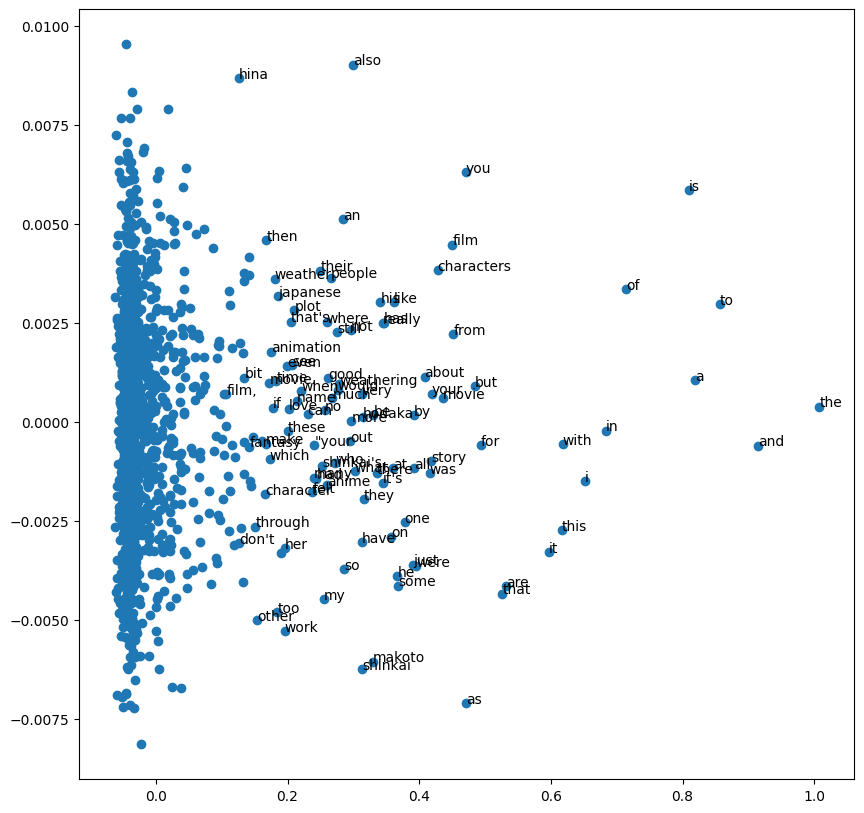

In [14]:
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

model = Word2Vec.load("word2vec_model.model")


X = model.wv[model.wv.index_to_key]


pca = PCA(n_components=2)
result = pca.fit_transform(X)


plt.figure(figsize=(10, 10))
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words[:100]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [16]:
import random
l = []
documentid = []
for i in range(len(df)):
  documentid.append(i)
  l.append(random.choice(["positive", "negative", "neutral"]))
df["sentiment"] = l
df["documentid"] = documentid

In [17]:
df.to_csv("review_sentiment.csv")

In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/Vedasri1998/Vedasri/blob/main/review_sentiment.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [18]:
# Type your answer
# the Assignmnet was hard in my point of view ,. as we have package for impelemting the if-df alorithm but build from basic is hard and i agree this will increase our knowledge about the algorithm